In [1]:
%cd src

/Users/kristjan.roosild/OneDrive/kool/AutoML/projekt/automl/src


In [2]:
# Load training data only
import pandas as pd

train = pd.read_csv('../input/santander-customer-transaction-prediction/train.csv')
y = train.target.values

train = train.drop(['ID_code', 'target'], axis=1)
X = train.values.astype(float)

In [3]:
X.shape, y.shape

((200000, 200), (200000,))

In [4]:
# train regressor, not classifier to be able to later get AUC score and curve from the prediction score
from autofeat import AutoFeatRegressor

afreg = AutoFeatRegressor(verbose=1, feateng_steps=1)
df = afreg.fit_transform(X, y)


[AutoFeat] The 1 step feature engineering process could generate up to 1400 features.
[AutoFeat] With 200000 data points this new feature matrix would use about 1.12 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 839 transformed features from 200 original features - done.
[feateng] Generated altogether 839 new features in 1 steps
[feateng] Removing correlated features, as well as additions at the highest level
[feateng] Generated a total of 409 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 281 features after 5 feature selection runs
[featsel] 257 features after correlation filtering
[featsel] 250 features after noise filtering
[AutoFeat] Computing 106 new features.
[AutoFeat]   106/  106 new features ...done.
[AutoFeat] Final dataframe with 306 feature co

In [5]:
df.shape

(200000, 306)

In [6]:
df[:10]

,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x131**2,x029**3,exp(x189),Abs(x119),1/x102,x178**2,x072**2,x182**3,Abs(x187),exp(x028)
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,0.128666,215.622220,1.796248,7.2739,0.037682,12.382657,27.038960,28.813032,19.7159,138.462565
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,0.031684,0.164657,0.700052,7.5109,0.028190,53.988695,10.049534,-3314.613771,15.9319,155.461793
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,0.009506,231.916910,0.430977,2.1056,0.067176,94.107461,40.420349,-2334.006810,6.2660,345.951987
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,1.099562,22.923246,6.352828,5.0988,0.053726,109.622994,1.566503,6.843849,12.8279,367.601694
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,0.891514,499.658905,0.753595,4.7478,0.057667,2.954617,0.527657,117.001920,5.9270,365.585435
5,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,5.9790,...,0.332006,0.070138,11.342991,2.8671,0.081446,58.190961,66.672124,11.025540,8.9114,172.328062
6,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,-4.3781,7.9232,...,0.292140,98.227428,6.384671,0.9810,0.048549,20.827358,13.727766,3933.985928,29.9763,282.930137
7,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,5.0647,7.1971,...,0.172890,509.967495,7.192940,0.0794,0.060283,0.427062,13.729989,339.133818,5.9076,232.781443
8,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,-3.1882,9.0827,...,1.230546,15.404793,2.016574,3.1809,0.063486,55.665029,8.326687,-1482.596925,18.3172,386.642309
9,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,0.1287,7.9682,...,0.110357,-0.000024,0.829195,2.2542,0.036862,193.098816,50.643149,-906.308550,21.6070,451.240294


In [7]:
# save the model to be able to create new features later
import pickle
with open('autofeat_regressor.pickle', mode='wb') as fp:
    pickle.dump(afreg, fp)

In [8]:
# load pickle to make sure everything checked out
import pickle
with open('autofeat_regressor.pickle', mode='rb') as fp:
    afreg_loaded = pickle.load(fp)
df_loaded = afreg_loaded.transform(X)

[AutoFeat] Computing 106 new features.
[AutoFeat]   106/  106 new features ...done.


In [9]:
# some sanity checks
df_loaded.shape

(200000, 306)

In [10]:
df_loaded[:10]

,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x131**2,x029**3,exp(x189),Abs(x119),1/x102,x178**2,x072**2,x182**3,Abs(x187),exp(x028)
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,0.128666,215.622220,1.796248,7.2739,0.037682,12.382657,27.038960,28.813032,19.7159,138.462565
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,0.031684,0.164657,0.700052,7.5109,0.028190,53.988695,10.049534,-3314.613771,15.9319,155.461793
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,0.009506,231.916910,0.430977,2.1056,0.067176,94.107461,40.420349,-2334.006810,6.2660,345.951987
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,1.099562,22.923246,6.352828,5.0988,0.053726,109.622994,1.566503,6.843849,12.8279,367.601694
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,0.891514,499.658905,0.753595,4.7478,0.057667,2.954617,0.527657,117.001920,5.9270,365.585435
5,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,5.9790,...,0.332006,0.070138,11.342991,2.8671,0.081446,58.190961,66.672124,11.025540,8.9114,172.328062
6,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,-4.3781,7.9232,...,0.292140,98.227428,6.384671,0.9810,0.048549,20.827358,13.727766,3933.985928,29.9763,282.930137
7,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,5.0647,7.1971,...,0.172890,509.967495,7.192940,0.0794,0.060283,0.427062,13.729989,339.133818,5.9076,232.781443
8,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,-3.1882,9.0827,...,1.230546,15.404793,2.016574,3.1809,0.063486,55.665029,8.326687,-1482.596925,18.3172,386.642309
9,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,0.1287,7.9682,...,0.110357,-0.000024,0.829195,2.2542,0.036862,193.098816,50.643149,-906.308550,21.6070,451.240294


In [11]:
(df == df_loaded)[:10]

,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x131**2,x029**3,exp(x189),Abs(x119),1/x102,x178**2,x072**2,x182**3,Abs(x187),exp(x028)
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [12]:
# predict for roc auc
y_pred = afreg_loaded.predict(X)


[AutoFeat] Computing 106 new features.
[AutoFeat]   106/  106 new features ...done.


In [13]:
from matplotlib import pyplot as plt
def draw_roc_curve(fpr, tpr, roc_score, algo_name):
    lw=2
    plt.figure()
    plt.plot(fpr, tpr, color="darkorange", lw=lw, label=f"ROC curve for training data (area = {roc_score:0.4f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.title(algo_name)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    plt.legend(loc="lower right")
    plt.show()

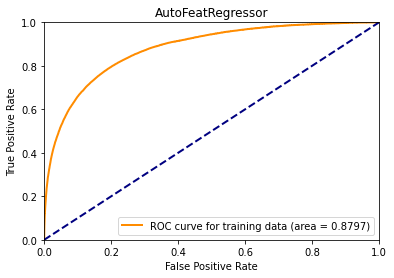

In [14]:
from sklearn import metrics
roc_score = metrics.roc_auc_score(y, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
draw_roc_curve(fpr, tpr, roc_score, 'AutoFeatRegressor')